# Time Series Processing

Version: 2022-10-13

In this notebook, we will cover how to process time series data. 


### A. Data

First let us load the data. We will use Hang Seng Index data from a csv file, 
but in practice you will probably want to pull the data with
a library such as `yfinance`.


In [1]:
import pandas as pd
import numpy as np

# Import stock data and keep only two variables
stock_data = pd.read_csv("../Data/hsi.csv")
stock_data.head(36)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,9982.259766,9982.259766,9764.980469,9809.169922,9809.169922,0.0
1,1999-01-05,9800.669922,9939.969727,9790.000000,9891.059570,9891.059570,0.0
2,1999-01-06,9967.429688,10233.799805,9967.429688,10233.799805,10233.799805,0.0
3,1999-01-07,10585.169922,10737.759766,10565.089844,10693.570313,10693.570313,0.0
4,1999-01-08,10713.150391,10898.250000,10687.790039,10722.700195,10722.700195,0.0
5,1999-01-11,10797.610352,10834.000000,10565.490234,10634.269531,10634.269531,0.0
6,1999-01-12,10530.620117,10735.330078,10456.009766,10711.559570,10711.559570,0.0
7,1999-01-13,10559.860352,10602.200195,10273.769531,10273.769531,10273.769531,0.0
8,1999-01-14,10058.160156,10283.889648,9907.799805,10183.129883,10183.129883,0.0
9,1999-01-15,9994.740234,10208.809570,9959.820313,10147.400391,10147.400391,0.0


We will will only keep the date and adjusted closing price.
We will also drop any samples with missing values.
- To drop rows with missing values:
```python
df.dropna()
```

In [2]:
# Keep only two columns and drop missing
stock_data = stock_data[["Date","Adj Close"]]
stock_data = stock_data.dropna()
stock_data.head(10)

,Date,Adj Close
0,1999-01-04,9809.169922
1,1999-01-05,9891.059570
2,1999-01-06,10233.799805
3,1999-01-07,10693.570313
4,1999-01-08,10722.700195
5,1999-01-11,10634.269531
6,1999-01-12,10711.559570
7,1999-01-13,10273.769531
8,1999-01-14,10183.129883
9,1999-01-15,10147.400391


### B. Datetime Index

We now carry out several time-series-specific operations:
- Convert the date to pandas **datatime** format, use ```pd.to_datetime()```.
  You can then extract individual date components by ```.dt.year```, ```.dt.month``` etc.
  For example, to extract year out of a column called *date*, you can write:
  ```python
  df['date'] = pd.to_datetime(df('date'))
  df['year'] = df('date').dt.year 
  ```
- Set the date as index. This allows the use of time-series-specific features.
```python
df.index = pd.DatetimeIndex(df['date_column'])
```
- Fill in missing dates:
```python
df.asfreq(freq,method)
```
where `freq` is the desired frequency and `method` is how the columns of newly inserted dates should be filled. 
See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) for a list of valid frequency. The default `method` is `None`, which means the newly inserted dates' columns have missing values. 
You can choose instead to propagate last valid observation forward (`method='pad'`) or use the next valid observation (`method='backfill'`).
  


In [5]:
# Convert date to pandas datetime format
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

# Use date as the index of the dataframe
stock_data.index = pd.DatetimeIndex(stock_data["Date"])

# Show the data
stock_data.head(10)

,Date,Adj Close
Date,,
1999-01-04,1999-01-04,9809.169922
1999-01-05,1999-01-05,9891.059570
1999-01-06,1999-01-06,10233.799805
1999-01-07,1999-01-07,10693.570313
1999-01-08,1999-01-08,10722.700195
1999-01-11,1999-01-11,10634.269531
1999-01-12,1999-01-12,10711.559570
1999-01-13,1999-01-13,10273.769531
1999-01-14,1999-01-14,10183.129883


In [6]:
# Fill in missing dates
stock_filled = stock_data.asfreq(freq='D',method='pad')

# Show the data
stock_filled.head(10)

,Date,Adj Close
Date,,
1999-01-04,1999-01-04,9809.169922
1999-01-05,1999-01-05,9891.059570
1999-01-06,1999-01-06,10233.799805
1999-01-07,1999-01-07,10693.570313
1999-01-08,1999-01-08,10722.700195
1999-01-09,1999-01-08,10722.700195
1999-01-10,1999-01-08,10722.700195
1999-01-11,1999-01-11,10634.269531
1999-01-12,1999-01-12,10711.559570


### C. What Do You Want to Model?

Next we have to decide what we want to model. Finance research mostly work with returns instead of price for a variety of reasons, but chief among those is the fact that return is stationary while price is usually not. 

More generally, when you model time series, you should consider whether you want to model:
- The original time series $x_t$
- First difference $x_t - x_{t-1}$
- Percentage change  $\frac{x_t - x_{t-1}}{x_{t-1}}$ 
- Direction of movement $\unicode{x1D7D9}\left[ x_t - x_{t-1} > 0 \right]$

This decision is important because it affects what models you can use and how well they might perform. For example, modelling direction of movement is a classification task, while the other three options are regression tasks.

The pandas technique we use here is ```.shift(x)```. 
This method shifts all rows down by *x* rows.
The nice thing about this technique is that you can totally do things
like 
```python
stock_data["Price"]/stock_data.shift(1)["Price"] - 1
```
which gives you all daily return in one single line.

In [5]:
# Change in index
stock_filled["change"] = (stock_filled["Adj Close"] 
                                     - stock_filled.shift(1)["Adj Close"])

# Direction of movement
stock_filled["direction"] = np.where(stock_filled["change"]>0,1,0)
stock_filled["direction"] = np.where(stock_filled["change"].isna(),
                                          np.nan,
                                          stock_filled["direction"])

# Return since the previous day
stock_filled["daily_return"] = (stock_filled["Adj Close"] /
                                     stock_filled.shift(1)["Adj Close"]
                                     - 1)
# 90-day future return
stock_filled["90d_return"] = (stock_filled.shift(-90)["Adj Close"] / 
                                   stock_filled["Adj Close"]
                                   - 1)
stock_filled.head(10)

,Date,Adj Close,change,direction,daily_return,90d_return
Date,,,,,,
1999-01-04,1999-01-04,9809.169922,NaN,NaN,NaN,0.128840
1999-01-05,1999-01-05,9891.059570,81.889648,1.0,0.008348,0.119494
1999-01-06,1999-01-06,10233.799805,342.740235,1.0,0.034652,0.082001
1999-01-07,1999-01-07,10693.570313,459.770508,1.0,0.044927,0.086155
1999-01-08,1999-01-08,10722.700195,29.129882,1.0,0.002724,0.093739
1999-01-09,1999-01-08,10722.700195,0.000000,0.0,0.000000,0.111110
1999-01-10,1999-01-08,10722.700195,0.000000,0.0,0.000000,0.111110
1999-01-11,1999-01-11,10634.269531,-88.430664,0.0,-0.008247,0.120350
1999-01-12,1999-01-12,10711.559570,77.290039,1.0,0.007268,0.096455


Note that `.shift()` does not take into consideration the nature of the index. If you have gaps in your data, what you get might not be want you intend:

In [6]:
# Calculate return without first filling missing dates
# We get return since previous trading day
stock_data["daily_return"] = (stock_data["Adj Close"] / 
                              stock_data.shift(1)["Adj Close"]
                              - 1)
stock_data.head(10)

,Date,Adj Close,daily_return
Date,,,
1999-01-04,1999-01-04,9809.169922,NaN
1999-01-05,1999-01-05,9891.059570,0.008348
1999-01-06,1999-01-06,10233.799805,0.034652
1999-01-07,1999-01-07,10693.570313,0.044927
1999-01-08,1999-01-08,10722.700195,0.002724
1999-01-11,1999-01-11,10634.269531,-0.008247
1999-01-12,1999-01-12,10711.559570,0.007268
1999-01-13,1999-01-13,10273.769531,-0.040871
1999-01-14,1999-01-14,10183.129883,-0.008822


In our case, maybe we do want return for a given number of trading days instead of return for a given number of calendar days. We can fill in the missing dates after we compute all the necessary variables.

### D. Lag Terms

In time series modelling we often include lag terms. Some models such as statsmodel's `ARMA` will compute the lag terms for you, but some others will not. If you need lag term for your model, you can also generate it with `.shift()`.

In [7]:
# Generate four period lag terms
for t in range(1,5):
    stock_data["ac_"+str(t)] = stock_data["Adj Close"].shift(t)
stock_data.head()

,Date,Adj Close,daily_return,ac_1,ac_2,ac_3,ac_4
Date,,,,,,,
1999-01-04,1999-01-04,9809.169922,NaN,NaN,NaN,NaN,NaN
1999-01-05,1999-01-05,9891.059570,0.008348,9809.169922,NaN,NaN,NaN
1999-01-06,1999-01-06,10233.799805,0.034652,9891.059570,9809.169922,NaN,NaN
1999-01-07,1999-01-07,10693.570313,0.044927,10233.799805,9891.059570,9809.169922,NaN
1999-01-08,1999-01-08,10722.700195,0.002724,10693.570313,10233.799805,9891.059570,9809.169922


Now let us try fitting some models. First, an ARIMA from `statsmodels`. We only need to provide the variable we want to model:

In [8]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA will complain if we do not set frequency
stock_filled = stock_data.asfreq('D')
arma = ARIMA(stock_filled["Adj Close"], order=(4, 0, 0)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 7404
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -35254.663
Date:                Thu, 04 Nov 2021   AIC                          70521.326
Time:                        10:51:31   BIC                          70562.785
Sample:                    01-04-1999   HQIC                         70535.572
                         - 04-12-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.904e+04   2514.951      7.571      0.000    1.41e+04     2.4e+04
ar.L1          0.9082      0.009     98.221      0.000       0.890       0.926
ar.L2          0.0760      0.014      5.287      0.000       0.048       0.104
ar.L3          0.0344      0.013      2.618      0.009       0.009       0.060
ar.L4         -0.0195      0.011     -1.785      0.074      -0.041       0.002
sigma2      6.166e+04    620.583     99.352      0.000    6.04e+04    6.29e+04
===================================================================================
Ljung-Box (Q):                       83.17   Jarque-Bera (JB):             36685.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We want to use a non-time-series-specific model like lasso, we will need the manually-created lag terms:

In [9]:
from sklearn.linear_model import Lasso 

data = stock_data.dropna()

#Run a lasso regression
lasso = Lasso(alpha=2000)
lasso.fit(data[["ac_1","ac_2","ac_3","ac_4"]],data["Adj Close"])

#Coefficients
print("Coefficients:",lasso.coef_)
print("Intecept:",lasso.intercept_)

Coefficients: [9.98866882e-01 1.06150200e-05 6.87872260e-05 0.00000000e+00]
Intecept: 23.911366268705024


### E. Changing Frequency and Rolling Window

You can change the frequency of the data with `pd.resample(freq).ops()`. For example, to get the weekly average return:

In [10]:
# Weekly average return
stock_data_w = stock_data[["Adj Close"]].resample('W').mean()
stock_data_w

,Adj Close
Date,
1999-01-10,10270.059961
1999-01-17,10390.025781
1999-01-24,10158.930078
1999-01-31,9519.370117
1999-02-07,9430.193945
...,...
2019-03-17,28819.053906
2019-03-24,29276.235938
2019-03-31,28729.016016


Another technique is `pd.rolling().ops`, which applies an operation for each sample across a rolling window:

In [11]:
# Rolling 7-trading-day average
stock_data_r = stock_data[["Adj Close"]].rolling(7).mean()
stock_data_r.head(12)

,Adj Close
Date,
1999-01-04,NaN
1999-01-05,NaN
1999-01-06,NaN
1999-01-07,NaN
1999-01-08,NaN
1999-01-11,NaN
1999-01-12,10385.161272
1999-01-13,10451.532645
1999-01-14,10493.256975


### F. Walk Forward Split

When working with time series data we need to ensure the training data comes before the validation and test data. Instead of randomly splitting the data, what we want is this:

![walk-forward-split](https://i.stack.imgur.com/padg4.gif)

The defining features are:
1. Test data must comes from a later date than training data.
2. Test data in each split do not overlap. 

Scikit-learn's `TimeSeriesSplit` can produce such splits:
```python
tscv = TimeSeriesSplit(n_splits, max_train_size)
for train_index, test_index in tscv.split(merged_data):
    # do something
```
Options:
- `n_splits` controls the number of splits returned. The default is 5 splits. You probably want more if you have very long time series.
- `max_train_size` specifies the maximum number of training samples in a split. The default is `None`, which means there is no limit. This also means by default each subsequent split will be longer than before, so specify this number if you want the splits to have equal size.  

**It is important note that walk-forward split as implemented by `TimeSeriesSplit` is *deterministic*---same data and same settings means the same split, everytime.** This is the nature of walk-forward split, and more generally the use of historical data for backtesting. There is a real chance of overfitting, because there is no guarantee that history will repeat itself in the exact same way.

Because `tscv.split()` returns *indexes*, you are responsible for fetching the data according to the indexes.

In [12]:
from sklearn.model_selection import TimeSeriesSplit

# 5 splits with 14 days of training data in each split
tscv = TimeSeriesSplit(max_train_size=14)
for i, (train_index, test_index) in enumerate(tscv.split(stock_data)):
    print("Split",i)
    print("Train:",train_index)
    print("Test :",test_index)

Split 0
Train: [823 824 825 826 827 828 829 830 831 832 833 834 835 836]
Test : [ 837  838  839  840  841  842  843  844  845  846  847  848  849  850
  851  852  853  854  855  856  857  858  859  860  861  862  863  864
  865  866  867  868  869  870  871  872  873  874  875  876  877  878
  879  880  881  882  883  884  885  886  887  888  889  890  891  892
  893  894  895  896  897  898  899  900  901  902  903  904  905  906
  907  908  909  910  911  912  913  914  915  916  917  918  919  920
  921  922  923  924  925  926  927  928  929  930  931  932  933  934
  935  936  937  938  939  940  941  942  943  944  945  946  947  948
  949  950  951  952  953  954  955  956  957  958  959  960  961  962
  963  964  965  966  967  968  969  970  971  972  973  974  975  976
  977  978  979  980  981  982  983  984  985  986  987  988  989  990
  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003 1004
 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 10

The lists are quite long, so they are hard to see. Let us just print their range:

In [13]:
from sklearn.model_selection import TimeSeriesSplit

# 5 splits with 14 days of training data in each split
tscv = TimeSeriesSplit(n_splits=5,max_train_size=14)
for i, (train_index, test_index) in enumerate(tscv.split(stock_data)):
    print("Split",i)
    print("Train:",train_index[0],"to",train_index[-1],
          "(",len(train_index),"samples )")
    print("Test :",test_index[0],"to",test_index[-1],
          "(",len(test_index),"samples )")

Split 0
Train: 823 to 836 ( 14 samples )
Test : 837 to 1669 ( 833 samples )
Split 1
Train: 1656 to 1669 ( 14 samples )
Test : 1670 to 2502 ( 833 samples )
Split 2
Train: 2489 to 2502 ( 14 samples )
Test : 2503 to 3335 ( 833 samples )
Split 3
Train: 3322 to 3335 ( 14 samples )
Test : 3336 to 4168 ( 833 samples )
Split 4
Train: 4155 to 4168 ( 14 samples )
Test : 4169 to 5001 ( 833 samples )


To fetch the actual data, use `df.iloc[list_of_indexes]`:

In [14]:
# Fetching the actual data
for i, (train_index, test_index) in enumerate(tscv.split(stock_data)):
    print("Split",i)
    print("Train:",stock_data[["Adj Close"]].iloc[train_index])

Split 0
Train:                Adj Close
Date                    
2002-05-10  11645.900391
2002-05-13  11733.429688
2002-05-14  11690.309570
2002-05-15  11838.360352
2002-05-16  11832.769531
2002-05-17  11974.610352
2002-05-21  11753.290039
2002-05-22  11795.200195
2002-05-23  11624.750000
2002-05-24  11626.780273
2002-05-27  11564.730469
2002-05-28  11581.580078
2002-05-29  11430.660156
2002-05-30  11380.610352
Split 1
Train:                Adj Close
Date                    
2005-09-15  15041.019531
2005-09-16  14983.200195
2005-09-20  15241.860352
2005-09-21  15223.620117
2005-09-22  15179.950195
2005-09-23  15143.969727
2005-09-26  15274.309570
2005-09-27  15189.879883
2005-09-28  15221.459961
2005-09-29  15431.250000
2005-09-30  15428.519531
2005-10-03  15394.389648
2005-10-04  15382.209961
2005-10-05  15161.030273
Split 2
Train:                Adj Close
Date                    
2009-02-05  13178.900391
2009-02-06  13655.040039
2009-02-09  13769.059570
2009-02-10  13880.639648
2009-

Finally let us put everything together for cross validation:

In [15]:
# Predict tomorrow's stock price with past four days of stock price
# Specify number of splits here
n_splits = 20

from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Drop any observation with missing columns
data = stock_data.dropna()

# Data
y = data[["Adj Close"]]
X = data[["ac_1","ac_2","ac_3","ac_4"]]

# Setup models
lasso = Lasso(alpha=500)
tscv = TimeSeriesSplit(n_splits=n_splits)

# List to store scores and predictions
oos_score_list = []
prediction_list = []

print("Split  In-sample R^2  Out-of-Sample R^2")
print("-"*40)

# Loop through the splits. Run a Lasso Regression for each split.
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    
    # Fetch data based on split
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    lasso.fit(X_train,y_train)
    
    # Record score and prediction
    oos_score = lasso.score(X_test,y_test)
    oos_score_list.append(oos_score)
    prediction = lasso.predict(X_test)
    prediction_list.append(prediction)
    
    print(str(i).center(5),
          str(round(lasso.score(X_train,y_train),2)).center(13),
          str(round(oos_score,2)).center(13)
         )
    
print("-"*40)
print("Average out-of-sample score:",round(np.mean(oos_score_list),2))

Split  In-sample R^2  Out-of-Sample R^2
----------------------------------------
  0        0.99          0.92    
  1        0.99          0.99    
  2        0.99          0.97    
  3        0.99          0.99    
  4        0.99          0.95    
  5        0.99          0.97    
  6        0.99          0.97    
  7        0.99          0.97    
  8        1.0           0.95    
  9        1.0           0.97    
  10       1.0           0.9     
  11       1.0           0.94    
  12       1.0           0.93    
  13       1.0           0.98    
  14       1.0           0.92    
  15       1.0           0.98    
  16       1.0           0.98    
  17       1.0           0.97    
  18       1.0           0.98    
  19       1.0           0.97    
----------------------------------------
Average out-of-sample score: 0.96


Let us plot the actual index versus the predicted index:

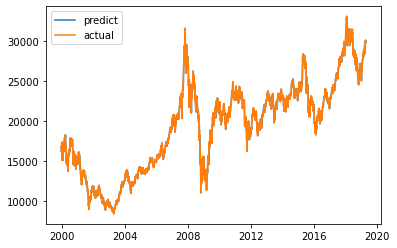

In [16]:
# Predicted index, actual index and corresponding dates
# Since predicted index is shorter than the actual index, we have to cut the latter
prediction = np.asarray(prediction_list).flatten()
actual = y[-1*len(prediction):].to_numpy() 
dates = data["Date"].to_numpy()
dates = dates[-1*len(prediction):]

# Line Chart
import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict") #First line
plt.plot(dates,actual,label="actual") #Second line
plt.rcParams["figure.figsize"] = (15,5) #Size
plt.legend() #Show legend
plt.show()

The two series look pretty close. Unfortunately, the chart is actually quite misleading. Let us see why in the next section.

### G. What Do You Want to Model? (Cont'd)

The out-of-sample score and the line chart from above might seem to suggest that our model of Hang Seng Index works quite well. We will now see why that is in fact not the case. 

Let us zoom into the line chart:

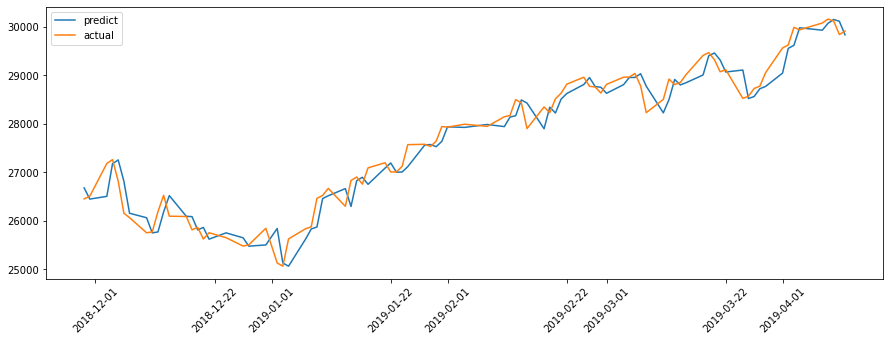

In [17]:
# Plot only the last 90 observations
prediction = np.asarray(prediction_list).flatten()
prediction = prediction[-90:]
actual = y[-1*len(prediction):].to_numpy()
dates = data["Date"].to_numpy()
dates = dates[-1*len(prediction):]

import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict")
plt.plot(dates,actual,label="actual")
plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=45)
plt.legend()
plt.show()

We now see the issue&mdash;the predicted index is basically the actual index lagged by one period. We can hardly call this a useful prediction. There is a reason why using a non-stationary time series as the target is problematic.

Let us try modelling return, first difference and direction of movement instead. Exact same design, just different variables. You will see they all perform very poorly.

Average out-of-sample score: -0.0


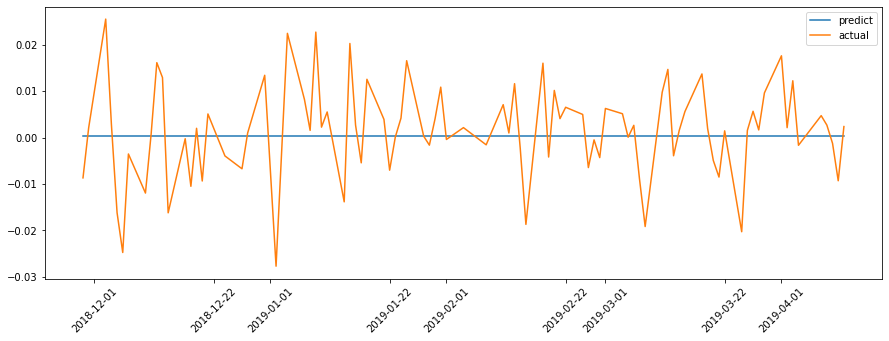

In [18]:
# Predict tomorrow's stock return with past four days of stock return
# Specify number of splits here
n_splits = 20

# Generate four period lag terms for return
for t in range(1,5):
    stock_data["dr_"+str(t)] = stock_data["daily_return"].shift(t)

from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

data = stock_data.dropna()

y = data[["daily_return"]]
X = data[["dr_1","dr_2","dr_3","dr_4"]]
lasso = Lasso(alpha=0.0001)
tscv = TimeSeriesSplit(n_splits=n_splits)
oos_score_list = []
prediction_list = []

# Loop through the splits. Run a Lasso Regression for each split.
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    
    # Fetch data based on split
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    lasso.fit(X_train,y_train)
    
    # Record score and prediction
    oos_score = lasso.score(X_test,y_test)
    oos_score_list.append(oos_score)
    prediction = lasso.predict(X_test)
    prediction_list.append(prediction)
    
print("Average out-of-sample score:",round(np.mean(oos_score_list),2))    

# Chart
prediction = np.asarray(prediction_list).flatten()
prediction = prediction[-90:]
actual = y[-1*len(prediction):].to_numpy()
dates = data["Date"].to_numpy()
dates = dates[-1*len(prediction):]

import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict")
plt.plot(dates,actual,label="actual")
plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Average out-of-sample score: -0.01


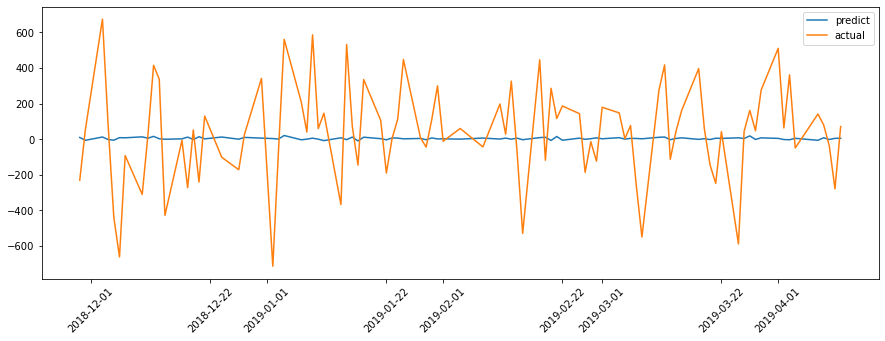

In [19]:
# Predict tomorrow's first difference with past four days' first difference
# Specify number of splits here
n_splits = 20

# Generate four period lag terms for first difference
stock_data["change"] = (stock_data["Adj Close"] 
                                     - stock_data.shift(1)["Adj Close"])
for t in range(1,5):
    stock_data["ch_"+str(t)] = stock_data["change"].shift(t)

from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

data = stock_data.dropna()

y = data[["change"]]
X = data[["ch_1","ch_2","ch_3","ch_4"]]
lasso = Lasso(alpha=0.0001)
tscv = TimeSeriesSplit(n_splits=n_splits)
oos_score_list = []
prediction_list = []

# Loop through the splits. Run a Lasso Regression for each split.
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    
    # Fetch data based on split
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    lasso.fit(X_train,y_train)
    
    # Record score and prediction
    oos_score = lasso.score(X_test,y_test)
    oos_score_list.append(oos_score)
    prediction = lasso.predict(X_test)
    prediction_list.append(prediction)
    
print("Average out-of-sample score:",round(np.mean(oos_score_list),2))    

# Chart
prediction = np.asarray(prediction_list).flatten()
prediction = prediction[-90:]
actual = y[-1*len(prediction):].to_numpy()
dates = data["Date"].to_numpy()
dates = dates[-1*len(prediction):]

import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict")
plt.plot(dates,actual,label="actual")
plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Average out-of-sample score: 0.51


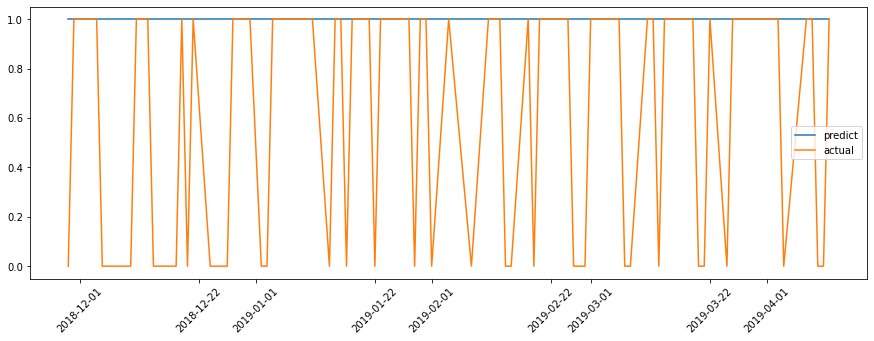

In [22]:
# Predict tomorrow's direction of movement with past four days' direction of movement
# Specify number of splits here
n_splits = 20

# Generate four period lag terms for direction of movement
stock_data["direction"] = np.where(stock_data["change"]>0,1,0)
stock_data["direction"] = np.where(stock_data["change"].isna(),
                                          np.nan,
                                          stock_data["direction"])
for t in range(1,5):
    stock_data["d_"+str(t)] = stock_data["direction"].shift(t)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

data = stock_data.dropna()

y = data["direction"]
X = data[["d_1","d_2","d_3","d_4"]]
model = LogisticRegression()
tscv = TimeSeriesSplit(n_splits=n_splits)
oos_score_list = []
prediction_list = []

# Loop through the splits. Run a Logistic Regression for each split.
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    
    # Fetch data based on split
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    model.fit(X_train,y_train)
    
    # Record score and prediction
    oos_score = model.score(X_test,y_test)
    oos_score_list.append(oos_score)
    prediction = model.predict(X_test)
    prediction_list.append(prediction)
    
print("Average out-of-sample score:",round(np.mean(oos_score_list),2))    

# Chart
prediction = np.asarray(prediction_list).flatten()
prediction = prediction[-90:]
actual = y[-1*len(prediction):].to_numpy()
dates = data["Date"].to_numpy()
dates = dates[-1*len(prediction):]

import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict")
plt.plot(dates,actual,label="actual")
plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=45)
plt.legend()
plt.show()